In [57]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 200)


In [41]:
# Read in Data and set it up
data = pd.read_csv('./testingProcess/processed_test4.txt')
data = data.drop_duplicates()
data = data[data['mPci'] > 0]
data = data[data['mRegistered'] == "YES"]
data = data.sort_values(by=['mTimeStamp'])

# Create Column to find if handover occurec
data['nextAP'] = data['mPci'].shift(-1)
data = data[:-1]
def label_handover_occured(row):
    if row['mPci'] == row['nextAP']:
        return 0
    return 1
data['handoverOccured'] = data.apply(lambda row: label_handover_occured(row), axis=1)

# Creating Training Data
data_X = []
data_Y = []
number_samples = 5
for index in range(0, len(data)-number_samples):
    dataframe = data.iloc[index:index+number_samples]
    dataframe = dataframe[['rsrq', 'handoverOccured']]
    data_X.append(dataframe['rsrq'].tolist())
    data_Y.append(dataframe.iloc[number_samples-1]['handoverOccured'])

print(data_X[0])
print(data_Y[0])




[-15, -9, -6, -7, -11]
0


Count of 0's: 191
Count of 1's: 19
Accuracy Score:  0.6634615384615384
Confusion Matrix:


[Text(0.5, 15.0, 'Prediction'), Text(33.0, 0.5, 'Ground Truth')]

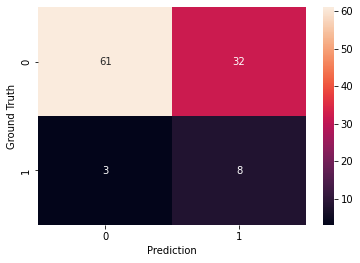

In [73]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.33, random_state=42)

count_0 = y_train.count(0)
count_1 = y_train.count(1)
print("Count of 0's: " + str(count_0))
print("Count of 1's: " + str(count_1))
w = {0: count_1, 1: count_0}
clf = LogisticRegression(random_state=0, class_weight=w).fit(X_train, y_train)
predictions = clf.predict(X_test)


print("Confusion Matrix:")
s = sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
s.set(xlabel='Prediction', ylabel='Ground Truth')
